<a href="https://colab.research.google.com/github/LuisYurovich/Mentoria_16_Analisis_Inteligente_de_Jugadores/blob/main/TPN%C2%B03_mentoria_16_corregido.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Diplomatura en Ciencia de Datos
---
## Mentorias N°16. Grupo 2
## Analisis inteligente de jugadores de un reconocido juego electronico


# Trabajo Práctico 3

**Integrantes:**


* Luis Federico Yurovich

* Nicolás Nazareno Rosales

* Rocío Martinez

**Lo primero que hacemos es cargar todas las librerias e importar el dataset trabajado en el entregable anterior para empezar a trabajar.**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold

from sklearn.linear_model import LogisticRegression


from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import plot_confusion_matrix

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBRegressor, XGBRFRegressor, XGBClassifier, XGBRFClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
url="/content/drive/Shareddrives/Análisis Inteligente de Jugadores de Reconocido Juego Electrónico/Rocio-Luis-Nicolas/TP N°3 /df_sn.csv"
df= pd.read_csv(url, sep = ',', index_col= 0)

**Cargamos el dataset proveniente del trabajo práctico N°2**

Se puede notar que se han renombrado a los jugadores

In [ ]:
df.sort_values(by='number_of_records',ascending= False)

,id,number_of_records,has_studies,country,gender,state,year_of_birth,min_cups,mean_cups,max_cups,first_cup,last_cup,age_aprox
276,Player-277,15746,t,Argentina,Hombre,Santa Fe,2000.0,0,1370.437508,1885,0,1544,22.0
946,Player-947,15673,t,Argentina,Hombre,Cordoba,1994.0,0,1259.498054,1780,0,1392,28.0
957,Player-958,15505,t,Argentina,Hombre,Entre Rios,1995.0,0,1328.677136,1802,0,1645,27.0
453,Player-454,15486,t,Argentina,Hombre,Mendoza,1989.0,0,1381.288067,1661,0,1282,33.0
970,Player-971,15287,f,Argentina,Hombre,Santa Fe,1992.0,0,1355.387650,1663,0,1107,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
827,Player-828,3,f,Venezuela,Hombre,Zulia,1986.0,1200,1200.000000,1200,1200,1200,36.0
912,Player-913,2,t,Argentina,Hombre,Buenos Aires,2001.0,1169,1169.000000,1169,1169,1169,21.0
753,Player-754,1,f,Argentina,Hombre,Buenos Aires,1989.0,1200,1200.000000,1200,1200,1200,33.0
489,Player-490,1,f,Argentina,Hombre,Cordoba,1997.0,907,907.000000,907,907,907,25.0


Verificamos que el dataset no contenga valores nulos

In [ ]:
df.isna().sum()

id                   0
number_of_records    0
has_studies          0
country              0
gender               0
state                0
year_of_birth        0
min_cups             0
mean_cups            0
max_cups             0
first_cup            0
last_cup             0
age_aprox            0
dtype: int64

Analizamos las métricas

In [ ]:
df.describe()

,number_of_records,year_of_birth,min_cups,mean_cups,max_cups,first_cup,last_cup,age_aprox
count,1432.000000,1432.000000,1432.000000,1432.000000,1432.000000,1432.000000,1432.000000,1432.000000
mean,3048.474162,1997.060056,603.311453,1131.915333,1415.086592,714.379888,1180.563547,24.939944
std,3577.377764,5.745161,498.881502,230.706357,280.287440,585.905024,236.449950,5.745161
min,1.000000,1959.000000,0.000000,82.152847,239.000000,0.000000,239.000000,0.000000
25%,406.000000,1995.000000,0.000000,1025.028755,1200.000000,0.000000,1041.750000,21.000000
50%,1444.500000,1998.000000,818.000000,1162.435415,1400.000000,999.000000,1195.500000,24.000000
75%,4476.250000,2001.000000,1023.000000,1271.060248,1609.250000,1200.000000,1307.250000,27.000000
max,15746.000000,2022.000000,1795.000000,2259.163734,2866.000000,2092.000000,2476.000000,63.000000


Se observa que se mantuvo un error en los features "age_aprox" y "year_of_birth", ya que hay casos de jugadores con edades de 0 y 1 año de vida (lo cual es absurdo) y en consecuencia estos jugadores aparecen como nacidos en los años 2021 y 2022. Para estos casos, reemplazaremos esos valores por la moda.

In [ ]:
print(df.age_aprox.mode())
print(df.year_of_birth.mode())

0    22.0
dtype: float64
0    2000.0
dtype: float64


In [ ]:
df["age_aprox"]=df["age_aprox"].replace([0.,1.],[22.,22.])

In [ ]:
df.age_aprox.describe()

count    1432.000000
mean       25.014665
std         5.564230
min        13.000000
25%        21.000000
50%        24.000000
75%        27.000000
max        63.000000
Name: age_aprox, dtype: float64

In [ ]:
df["year_of_birth"]=df["year_of_birth"].replace([2022.,2021.],[2000.,2000.])

In [ ]:
df.year_of_birth.describe()

count    1432.000000
mean     1996.985335
std         5.564230
min      1959.000000
25%      1995.000000
50%      1998.000000
75%      2001.000000
max      2009.000000
Name: year_of_birth, dtype: float64

La medida que definiremos para indicar que tan bueno es un jugador será la diferencia entre la máxima copa que obtuvo y la cantidad de copas con las que arrancó el juego. A esta variable la llamaremos "rendimiento".
Tomamos esta decisíon ya que puede suceder que jugadores hayan comprado copas al iniciar la partida.

In [ ]:
df["rendimiento"]=df['max_cups']-df['first_cup'] 
df.rendimiento.describe()

count    1432.000000
mean      700.706704
std       728.563866
min         0.000000
25%        18.750000
50%       316.000000
75%      1502.000000
max      2866.000000
Name: rendimiento, dtype: float64

##Sección 1: Preparación

**(1) ¿Cuál será la variable target para predecir? Elegir una o generar una a partir de los datos.**


Para estudiar el desempeño de un buen jugador, nos quedamos con los jugadores con más de 100 registros ya que un jugador puede haber conseguido un alto número de copas en pocos registros, y con eso no podemos ver una regularidad ya que podría ser *suerte de principiante*. Luego recategorizamos teniendo en cuenta el máximo de copas ganadas, basándonos en ello para asumir el desempeño de los jugadores. Las categorias son: **B** para jugadores cuyo rendimiento sea menor al rendimiento medio (mal jugador) y **A** para jugadores cuyo rendimiento sea mayor al rendimiento medio (buen jugador).

In [ ]:
df_target = df.copy()

In [ ]:
df_target = df_target.assign(category = 'A')
df_target

,id,number_of_records,has_studies,country,gender,state,year_of_birth,min_cups,mean_cups,max_cups,first_cup,last_cup,age_aprox,rendimiento,category
0,Player-1,868,t,Venezuela,Hombre,Miranda,1997.0,1019,1100.533410,1211,1052,1105,25.0,159,A
1,Player-2,4199,t,Venezuela,Hombre,Miranda,2003.0,1027,1296.185520,1559,1226,1322,19.0,333,A
2,Player-3,7243,t,Argentina,Hombre,Chubut,1996.0,0,1205.839431,1859,0,1511,26.0,1859,A
3,Player-4,1326,t,Venezuela,Hombre,Anzoategui,1996.0,752,1003.906486,1221,883,1079,26.0,338,A
4,Player-5,869,t,Argentina,Hombre,Buenos Aires,1995.0,261,775.706559,1200,999,1200,27.0,201,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1427,Player-1428,9395,t,Venezuela,Hombre,Monagas,2000.0,0,1111.672698,1724,0,1137,22.0,1724,A
1428,Player-1429,15228,t,Argentina,Hombre,Buenos Aires,2000.0,0,1245.974521,1856,0,1375,22.0,1856,A
1429,Player-1430,47,t,Argentina,Hombre,Buenos Aires,2003.0,1146,1148.234043,1176,1146,1176,19.0,30,A
1430,Player-1431,1505,t,Argentina,Hombre,Buenos Aires,1997.0,1085,1260.233887,1421,1363,1240,25.0,58,A


In [ ]:
df_cat = df_target.loc[df_target.number_of_records >= 100]

In [ ]:
df_cat.loc[df.rendimiento < df.rendimiento.mean() , 'category'] = 'B'
df_cat

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,id,number_of_records,has_studies,country,gender,state,year_of_birth,min_cups,mean_cups,max_cups,first_cup,last_cup,age_aprox,rendimiento,category
0,Player-1,868,t,Venezuela,Hombre,Miranda,1997.0,1019,1100.533410,1211,1052,1105,25.0,159,B
1,Player-2,4199,t,Venezuela,Hombre,Miranda,2003.0,1027,1296.185520,1559,1226,1322,19.0,333,B
2,Player-3,7243,t,Argentina,Hombre,Chubut,1996.0,0,1205.839431,1859,0,1511,26.0,1859,A
3,Player-4,1326,t,Venezuela,Hombre,Anzoategui,1996.0,752,1003.906486,1221,883,1079,26.0,338,B
4,Player-5,869,t,Argentina,Hombre,Buenos Aires,1995.0,261,775.706559,1200,999,1200,27.0,201,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1426,Player-1427,883,f,Venezuela,Hombre,Miranda,1988.0,1017,1165.937712,1371,1280,1153,34.0,91,B
1427,Player-1428,9395,t,Venezuela,Hombre,Monagas,2000.0,0,1111.672698,1724,0,1137,22.0,1724,A
1428,Player-1429,15228,t,Argentina,Hombre,Buenos Aires,2000.0,0,1245.974521,1856,0,1375,22.0,1856,A
1430,Player-1431,1505,t,Argentina,Hombre,Buenos Aires,1997.0,1085,1260.233887,1421,1363,1240,25.0,58,B


In [ ]:
df_cat.category.value_counts()

B    805
A    556
Name: category, dtype: int64

Contamos con 805 jugadores que pertenecen a la categoria "A" y 556 a la categoria "B".

**(2) ¿Cuáles serán las variables de entrada?**

Previo a la elección de las variables de entrada para los modelos de predicción, observaremos y analizaremos las correlaciones entre las features de nuestro dasatset.

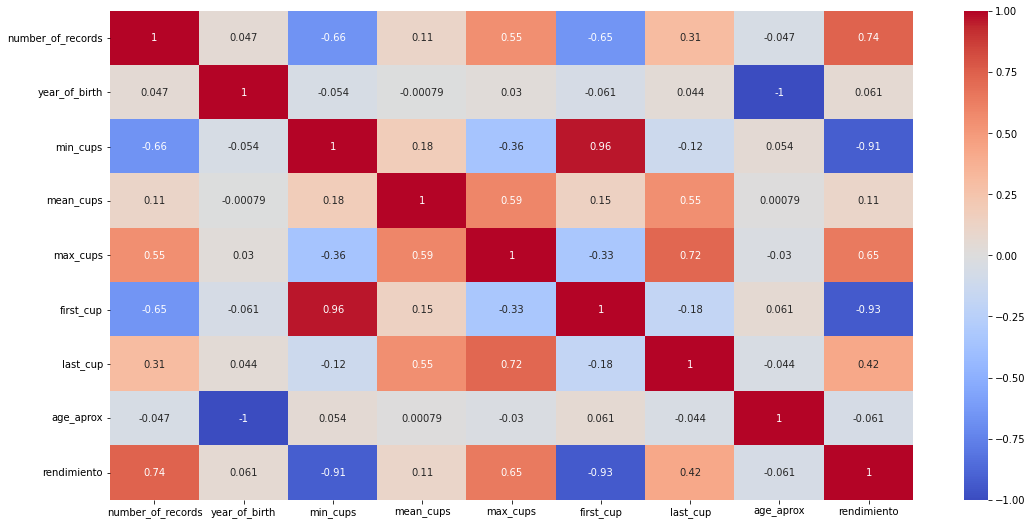

In [ ]:
plt.figure(figsize=(18, 9))
sns.heatmap(df_cat.corr(), cmap="coolwarm", annot=True)
plt.show()

<Figure size 1296x648 with 0 Axes>

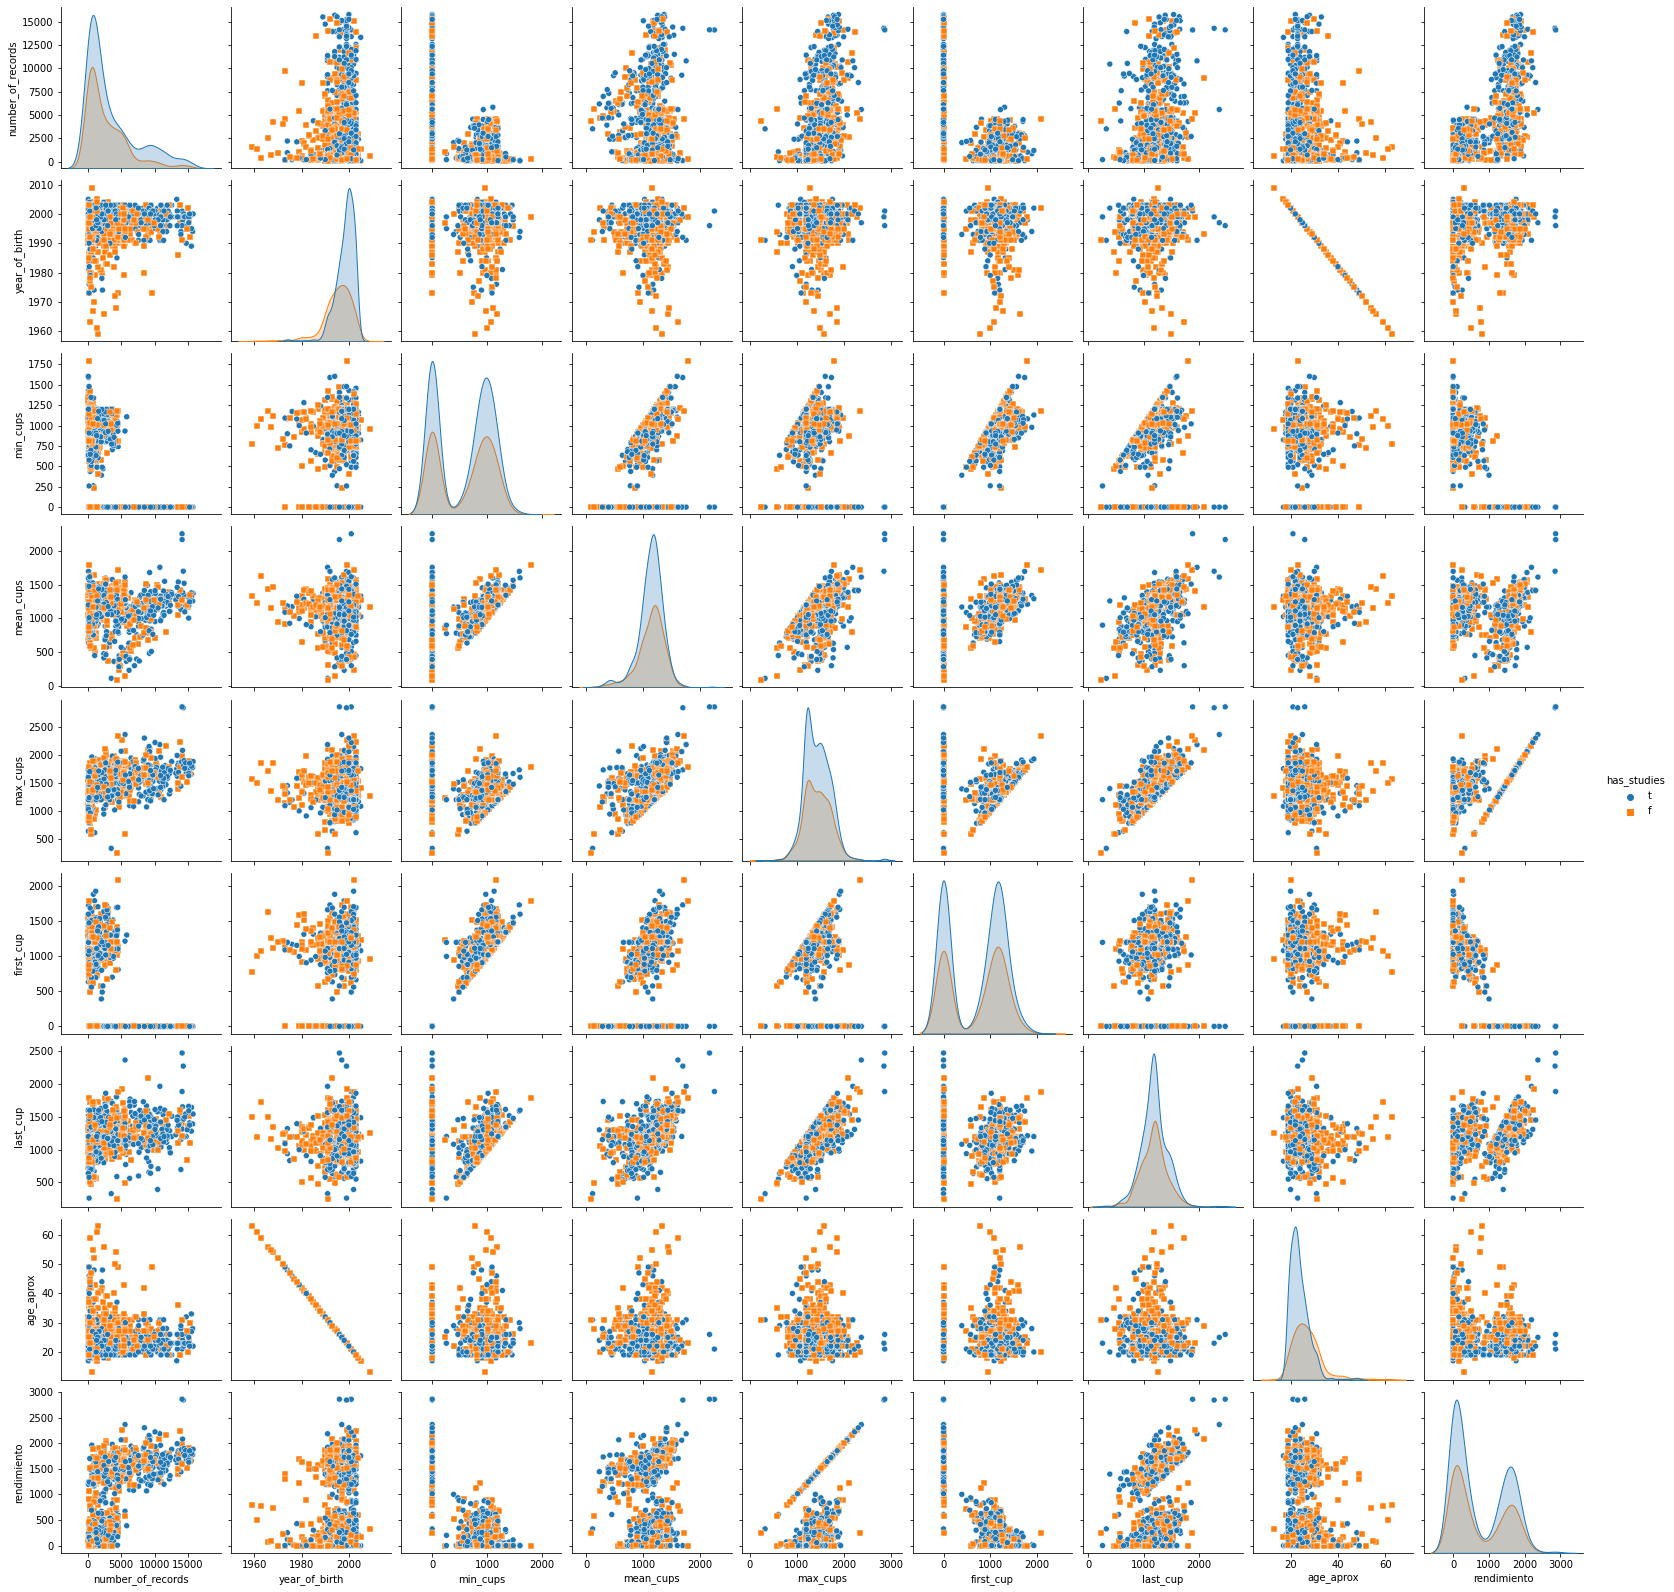

In [ ]:
plt.figure(figsize=(18, 9))
sns.pairplot(data=df_cat, hue="has_studies", markers=["o", "s"])
plt.show()

Con estos gráficos se observa una correlación entre las variables 'year_of_birth' y 'age_aprox', lo cual resulta lógico ya que el atributo 'age_aprox' se definío en función del atributo 'year_of_birth' . Es por esto que se tomó la decisión de no agregar a la variable 'year_of_birth' como entrada a nuestro modelo. Ademas, excluímos el 'id' también, ya que el *nombre* no determina la calidad de juego.

Por lo tanto nuestras variables de entrada serán:


*   number_of_records
*   age_aprox
*   has_studies
*   gender
*   country
*   state



**(3) ¿Será un problema de clasificación o regresión?**

El objetivo de nuestro modelo será predecir a qué categoria pertenece (A ó B) un determinado jugador de acuerdo a las variables de entrada definidas. Esto nos indica que afrontaremos un problema de clasificación.

**Encoding**

Sabiendo que los algoritmos de aprendizaje automático requieren exclusivamente datos numéricos, es necesario transformar nuestras variables categóricas a algún formato numérico. Es por ello que aplicaremos el algoritmo de one hot encoding para cambiar el formato de estas variables.

Variables categóricas:

*    country
*    has_studies
*    gender
*    state

**Country**

In [ ]:
df_processed = df_cat.copy()

df_processed

,id,number_of_records,has_studies,country,gender,state,year_of_birth,min_cups,mean_cups,max_cups,first_cup,last_cup,age_aprox,rendimiento,category
0,Player-1,868,t,Venezuela,Hombre,Miranda,1997.0,1019,1100.533410,1211,1052,1105,25.0,159,B
1,Player-2,4199,t,Venezuela,Hombre,Miranda,2003.0,1027,1296.185520,1559,1226,1322,19.0,333,B
2,Player-3,7243,t,Argentina,Hombre,Chubut,1996.0,0,1205.839431,1859,0,1511,26.0,1859,A
3,Player-4,1326,t,Venezuela,Hombre,Anzoategui,1996.0,752,1003.906486,1221,883,1079,26.0,338,B
4,Player-5,869,t,Argentina,Hombre,Buenos Aires,1995.0,261,775.706559,1200,999,1200,27.0,201,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1426,Player-1427,883,f,Venezuela,Hombre,Miranda,1988.0,1017,1165.937712,1371,1280,1153,34.0,91,B
1427,Player-1428,9395,t,Venezuela,Hombre,Monagas,2000.0,0,1111.672698,1724,0,1137,22.0,1724,A
1428,Player-1429,15228,t,Argentina,Hombre,Buenos Aires,2000.0,0,1245.974521,1856,0,1375,22.0,1856,A
1430,Player-1431,1505,t,Argentina,Hombre,Buenos Aires,1997.0,1085,1260.233887,1421,1363,1240,25.0,58,B


In [ ]:
from sklearn.preprocessing import OneHotEncoder

one_hot_enc = OneHotEncoder()

In [ ]:
df_processed.shape

(1361, 15)

In [ ]:
country_enc = one_hot_enc.fit_transform(df_processed["country"].values.reshape(-1,1))

In [ ]:
country_enc.toarray().shape

(1361, 13)

In [ ]:
df_processed.loc[:,[f"country_{cat}" for cat in one_hot_enc.categories_[0]]] = country_enc.toarray()

In [ ]:
df_processed.shape

(1361, 28)

**has_studies**

In [ ]:
has_studies_enc = one_hot_enc.fit_transform(df_processed["has_studies"].values.reshape(-1,1))
df_processed.loc[:, [f"has_studies_{cat}" for cat in one_hot_enc.categories_[0]]] = has_studies_enc.toarray()

In [ ]:
df_processed.shape

(1361, 30)

**Gender**

In [ ]:
#gender_enc = one_hot_enc.fit_transform(df_processed["gender"].values.reshape(-1,1))
#df_processed.loc[:, [f"gender_{cat}" for cat in one_hot_enc.categories_[0]]] = gender_enc.toarray()

In [ ]:
#df_processed.shape

**State**

In [ ]:
state_enc = one_hot_enc.fit_transform(df_processed["state"].values.reshape(-1,1))
df_processed.loc[:, [f"state_{cat}" for cat in one_hot_enc.categories_[0]]] = state_enc.toarray()

In [ ]:
df_processed.shape

(1361, 101)

In [ ]:
df_processed

,id,number_of_records,has_studies,country,gender,state,year_of_birth,min_cups,mean_cups,max_cups,...,state_Sucre,state_Tachira,state_Tierra del Fuego,state_Tlaxcala,state_Trujillo,state_Tucuman,state_Valle del cauca,state_Veracruz,state_Yaracuy,state_Zulia
0,Player-1,868,t,Venezuela,Hombre,Miranda,1997.0,1019,1100.533410,1211,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Player-2,4199,t,Venezuela,Hombre,Miranda,2003.0,1027,1296.185520,1559,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Player-3,7243,t,Argentina,Hombre,Chubut,1996.0,0,1205.839431,1859,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Player-4,1326,t,Venezuela,Hombre,Anzoategui,1996.0,752,1003.906486,1221,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Player-5,869,t,Argentina,Hombre,Buenos Aires,1995.0,261,775.706559,1200,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1426,Player-1427,883,f,Venezuela,Hombre,Miranda,1988.0,1017,1165.937712,1371,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1427,Player-1428,9395,t,Venezuela,Hombre,Monagas,2000.0,0,1111.672698,1724,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1428,Player-1429,15228,t,Argentina,Hombre,Buenos Aires,2000.0,0,1245.974521,1856,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1430,Player-1431,1505,t,Argentina,Hombre,Buenos Aires,1997.0,1085,1260.233887,1421,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Escalado**

Se implementa el escalado de las variables númericas que formaran parte de las features de entrada del modelo. Estas son:


*   age_aprox
*   number_of_records



In [ ]:
from sklearn.preprocessing import MinMaxScaler

df_scaled=df_processed.copy()

column_1 = 'age_aprox'
column_2 = 'number_of_records'

df_scaled[column_1] = MinMaxScaler().fit_transform(np.array(df_scaled[column_1]).reshape(-1,1))
df_scaled[column_2] = MinMaxScaler().fit_transform(np.array(df_scaled[column_2]).reshape(-1,1))

In [ ]:
X = df_scaled.drop(columns = "category")
y = df_scaled.category

**(4) Definir las métricas a utilizar.**

La métrica que utilizaremos para medir el desempeño de nuestros modelos es el "accuracy".

**(5) Dividir el conjunto de datos en train-test-val.**

Se procede al dividir nuestro dataset en: 


*   Train Dataset: Conjunto de datos utilizados para el aprendizaje (por el modelo), es decir, para ajustar los parámetros al modelo de aprendizaje automático. Representa el 80% del conjunto de datos.

*   Test Dataset: Conjunto de datos que se utiliza para proporcionar una evaluación imparcial de un modelo ajustado en el conjunto de datos de entrenamiento mientras se ajustan los hiperparámetros del modelo.Representa el 10% del conjunto de datos.

*   Val Dataset: Conjunto de datos utilizados para proporcionar una evaluación imparcial de un modelo final ajustado en el conjunto de datos de entrenamiento.Representa el 10% del conjunto de datos.




A continuación, eliminamos aquellos atributos que no formaran parte en la entrada de los modelos. Estos son:


*   id: consideramos que el "id" no es un atributo que influya en el rendimeitno del jugador. 
*   has_studies, gender, country y state: estas variables son categóricas. Si estas variables ingresan a los modelos de machine learning, se generará un erro.
*  year_of_birth: se decidió eliminar este feature porque esta fuertemente correlacionado con la variable "age_aprox"
*   max_cups, mean_cups, min_cups, first_cup, last_cup y rendimiento: teniendo en cuenta que el target fue definido teniendo en cuenta la cantidad de copas y el rendimiento del jugador.






In [ ]:
X = X.drop(columns = ['id','has_studies','country','gender','state','year_of_birth','max_cups','mean_cups','min_cups','first_cup','last_cup','rendimiento'])

Se fija la semilla (random_state) para asegurar la reproducibilidad de los datos.

In [ ]:
random_state_n = 100

In [ ]:
from sklearn.model_selection import train_test_split

# Let's say we want to split the data in 80:10:10 for train:valid:test dataset


# In the first step we will split the data in training and remaining dataset
x_train, x_rem, y_train, y_rem = train_test_split(X,y, train_size=0.8,random_state=random_state_n)

# Now since we want the valid and test size to be equal (10% each of overall data). 
# we have to define valid_size=0.5 (that is 50% of remaining data)
test_size = 0.5
x_valid, x_test, y_valid, y_test = train_test_split(x_rem,y_rem, test_size=0.5, random_state=random_state_n)

print(x_train.shape), print(y_train.shape)
print(x_valid.shape), print(y_valid.shape)
print(x_test.shape), print(y_test.shape)

(1088, 88)
(1088,)
(136, 88)
(136,)
(137, 88)
(137,)


(None, None)

##Sección 2: Entrenamiento

**(1) Elegir qué modelos entrenar.**

Los modelos seleccionados para entrenar nuestro modelo son:

*   Random Forest 
*   Regresión Logística 
*   Gradient Boosting


Definimos la función tune_model. Esta función sera alimentada por los siguientes argumentos:
*  clf: modelo de calsificación
*  param_grid: grilla de hiperparametros (de cada modelo).
*  x_train
*  x_test
*  y_train
*  y_test

El objetivo de esta función es encontrar los parametros que mejoren la performance de cada modelo. Una vez que se obtienen los parametros con mejor ranking, la función se encargará de mostrar el accuracy y la matriz de confución  del conjunto de entrenamiento y test.
Esta función se aplicará únicamente al modelo de Regresión Logística

In [ ]:
def tune_model(clf, param_grid, 
               x_train, x_test, 
               y_train, y_test):
  cvc = GridSearchCV(clf, param_grid, cv = 5, scoring = "accuracy", n_jobs = -1)
  cvc.fit(x_train, y_train)

  results = cvc.cv_results_
  df_results = pd.DataFrame(results)

  display(df_results.sort_values('rank_test_score'))


  train_predictions = cvc.predict(x_train)
  accuracy = accuracy_score(y_train, train_predictions)
  print(f"Accuracy train {np.round(accuracy * 100.0,1)}%")

  test_predictions = cvc.predict(x_test)
  accuracy = accuracy_score(y_test, test_predictions)
  print(f"Accuracy test {np.round(accuracy * 100.0,1)}")


  print("\n Train")
  plot_confusion_matrix(cvc,x_train,y_train)

  print("\n Test")
  plot_confusion_matrix(cvc,x_test,y_test)

  return cvc

**Búsqueda Aleatoria – RandomSearch**

Este tipo de búsqueda prueba combinaciones de valores al azar que se le proporcione en el grid de parámetros. Al ser una búsqueda aleatoria, es muy posible que no nos quedemos con la combinación de hiperparámetros óptima para nuestros datos. Pero ahorraremos mucho tiempo, sobre todo cuanto más tarde el modelo en entrenar y más posibles hiperparámetros especifiquemos.
La función tune_model_random se aplicará a los modelos de Random Forest y XG Boost.

In [ ]:
def tune_model_random(clf, param_grid, 
               x_train, x_test, 
               y_train, y_test):
  cvc = RandomizedSearchCV(clf, param_grid, n_iter = 30,cv = 5, scoring = "accuracy", n_jobs = -1, random_state=random_state_n)
  cvc.fit(x_train, y_train)

  results = cvc.cv_results_
  df_results = pd.DataFrame(results)

  display(df_results.sort_values('rank_test_score'))


  train_predictions = cvc.predict(x_train)
  accuracy = accuracy_score(y_train, train_predictions)
  print(f"Accuracy train {np.round(accuracy * 100.0,1)}%")


  test_predictions = cvc.predict(x_test)
  accuracy = accuracy_score(y_test, test_predictions)
  print(f"Accuracy test {np.round(accuracy * 100.0,1)}%")

  print("\n Train")
  plot_confusion_matrix(cvc,x_train,y_train)

  print("\n Test")
  plot_confusion_matrix(cvc,x_test,y_test)

  return cvc

**Random Forest**

Entrenamos el modelo de Random Forest con los parámetros por defecto.



In [ ]:
clf_rforest = RandomForestClassifier(random_state=random_state_n)


In [ ]:
clf_rforest.fit(x_train, y_train) # entrenamiento

RandomForestClassifier(random_state=100)

In [ ]:
y_pred_rf = clf_rforest.predict(x_test) # predicción
print(classification_report(y_true = y_test,
                            y_pred = y_pred_rf,zero_division=0))

              precision    recall  f1-score   support

           A       0.86      0.79      0.82        61
           B       0.84      0.89      0.87        76

    accuracy                           0.85       137
   macro avg       0.85      0.84      0.84       137
weighted avg       0.85      0.85      0.85       137



El accuracy obtenido es de 85%. Además podemos ver que el recall de la categoria "A" (0.79), es menor al de la categoria "B" (0.89), lo cual indica que clasifica mejor a las categoria "B" que a la categoria "A". Quizas esto es consecuencia de que se tiene mayor cantidad de casos con la etiqueta "B".

**Ajuste de hiperparámetros (Random Forest)**

Se procede al ajuste de los hiperparámetros. Los paramétros que ajustaremos son:

*  n_estimators: número de árboles en el bosque.

*  criterion: función para medir la calidad de una división. Los criterios admitidos son "gini", "log_loss" y "entropía".

*   max_depth: la profundidad máxima del árbol. Si es Ninguno, los nodos se expanden hasta que todas las hojas sean puras o hasta que todas las hojas contengan menos de min_samples_split samples.

*   max_features: El número de características a tener en cuenta al buscar la mejor división.

In [ ]:
rforest_grid = { 
    'n_estimators': [100,200, 350,500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [5,8, 15, 30, None],
    'criterion' :['gini', 'entropy']
}

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_features,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
24,1.489031,0.013890,0.119718,0.002922,500,log2,15,gini,"{'n_estimators': 500, 'max_features': 'log2', ...",0.848624,0.876147,0.844037,0.829493,0.824885,0.844637,0.018048,1
20,0.305877,0.006154,0.028251,0.002601,100,sqrt,15,gini,"{'n_estimators': 100, 'max_features': 'sqrt', ...",0.830275,0.880734,0.834862,0.838710,0.834101,0.843737,0.018692,2
5,1.775369,0.394098,0.097461,0.030826,350,auto,15,gini,"{'n_estimators': 350, 'max_features': 'auto', ...",0.825688,0.876147,0.834862,0.838710,0.834101,0.841902,0.017642,3
14,0.289989,0.005667,0.028508,0.002745,100,log2,15,gini,"{'n_estimators': 100, 'max_features': 'log2', ...",0.844037,0.876147,0.844037,0.824885,0.820276,0.841876,0.019693,4
18,0.648388,0.019567,0.055124,0.003190,200,sqrt,15,gini,"{'n_estimators': 200, 'max_features': 'sqrt', ...",0.821101,0.876147,0.839450,0.834101,0.834101,0.840980,0.018595,5
13,0.605333,0.011089,0.053043,0.006315,200,auto,15,gini,"{'n_estimators': 200, 'max_features': 'auto', ...",0.821101,0.876147,0.839450,0.834101,0.834101,0.840980,0.018595,5
9,0.593253,0.011700,0.050372,0.001535,200,log2,15,gini,"{'n_estimators': 200, 'max_features': 'log2', ...",0.839450,0.876147,0.834862,0.834101,0.820276,0.840967,0.018721,7
8,0.519579,0.010389,0.052414,0.008360,200,log2,8,gini,"{'n_estimators': 200, 'max_features': 'log2', ...",0.844037,0.876147,0.834862,0.829493,0.820276,0.840963,0.019204,8
22,1.112916,0.008593,0.080290,0.001757,350,sqrt,15,entropy,"{'n_estimators': 350, 'max_features': 'sqrt', ...",0.853211,0.862385,0.834862,0.829493,0.820276,0.840046,0.015501,9
21,1.614584,0.033168,0.118899,0.003294,500,sqrt,15,entropy,"{'n_estimators': 500, 'max_features': 'sqrt', ...",0.853211,0.871560,0.830275,0.824885,0.820276,0.840041,0.019404,10


Accuracy train 88.9%
Accuracy test 86.9%

 Train


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)



 Test


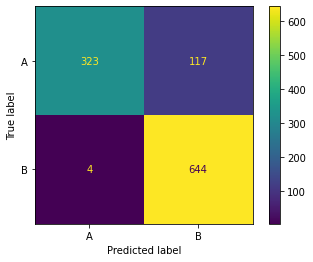

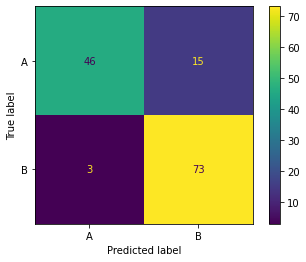

In [ ]:
cvc = tune_model_random(clf_rforest,
           rforest_grid,
            x_train, x_test, 
            y_train, y_test)

cvc_rf = cvc

Observamos que con este método obtenemos:

* Accuracy train: 88.9%
* Accuracy test: 86.9%

En base al accuracy obtenido, se puede decir que este modelo clasifica levemente mejor que el random forest con parámetros por defecto.

In [ ]:
cvc_rf.best_estimator_

RandomForestClassifier(max_depth=15, max_features='log2', n_estimators=500,
                       random_state=100)

Mejor estimador:

*  max_depth=15
*  n_estimators=500
*  criterion= "gini"
*  max_features = "log2"

In [ ]:
#cvc.best_estimator_.coef_
bestcoef_rf = pd.Series(cvc.best_estimator_.feature_importances_, index = X.columns).sort_values(ascending=False)
bestcoef_rf[:10]
#bestcoef.plot(kind="bar")

number_of_records    0.743568
age_aprox            0.100914
has_studies_f        0.009628
has_studies_t        0.009072
state_Rio Negro      0.006477
state_Anzoategui     0.005836
state_Santa Fe       0.004838
state_Cordoba        0.004724
state_Guarico        0.004714
state_Salta          0.004589
dtype: float64

Se observa que las variables más influyentes para la predicción son el número de registro de los jugadores y la edad de los mismos.

**Regresión Logística**

Entrenamos el modelo de Regresión logística con los parámetros por defecto.

In [ ]:
Logist_regr_clf = LogisticRegression(random_state=random_state_n)

In [ ]:
Logist_regr_clf.fit(x_train,y_train)

LogisticRegression(random_state=100)

In [ ]:
y_pred_lr = Logist_regr_clf.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_lr)

0.8394160583941606

El accuracy obtenido es 84%

**Ajuste de hiperparámetros (Regresión Logística)**

Los parámetros que ajustaremos para el modelo de Regresión logistica son:


*   C: Inverso de la tasa de regularización, los valores más pequeños especifican una regularización más fuerte.

*   penalty: Especifica la norma de la penalización. 'l2' agrega un término de penalización L2 ; 'l1': agrega un término de penalización L1.

* max_iter: Número máximo de iteraciones necesarias para que los solucionadores converjan.

* solver: Algoritmo a utilizar en el problema de optimización.




In [ ]:
C = np.logspace(-4, 4, 10)
penalty = ['l1', 'l2']
max_iter = [100,200]
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

parameters_log_regr = dict(C=C,
                  penalty=penalty,
                  max_iter = max_iter,
                  solver = solver)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
300 fits failed out of a total of 1000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: So

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_max_iter,param_penalty,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
72,0.009423,0.001732,0.003878,0.000164,0.046416,200,l1,liblinear,"{'C': 0.046415888336127774, 'max_iter': 200, '...",0.839450,0.876147,0.844037,0.866359,0.815668,0.848332,0.021274,1
62,0.008946,0.000780,0.003953,0.000155,0.046416,100,l1,liblinear,"{'C': 0.046415888336127774, 'max_iter': 100, '...",0.839450,0.876147,0.844037,0.866359,0.815668,0.848332,0.021274,1
106,0.045392,0.006773,0.003849,0.000096,2.782559,100,l2,lbfgs,"{'C': 2.782559402207126, 'max_iter': 100, 'pen...",0.825688,0.885321,0.830275,0.852535,0.834101,0.845584,0.021860,3
105,0.040081,0.003313,0.004005,0.000224,2.782559,100,l2,newton-cg,"{'C': 2.782559402207126, 'max_iter': 100, 'pen...",0.825688,0.885321,0.830275,0.852535,0.834101,0.845584,0.021860,3
119,0.139577,0.010715,0.004472,0.000425,2.782559,200,l2,saga,"{'C': 2.782559402207126, 'max_iter': 200, 'pen...",0.825688,0.885321,0.830275,0.852535,0.834101,0.845584,0.021860,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,0.002516,0.002802,0.000000,0.000000,21.544347,100,l1,newton-cg,"{'C': 21.54434690031882, 'max_iter': 100, 'pen...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,196
40,0.001121,0.000123,0.000000,0.000000,0.005995,100,l1,newton-cg,"{'C': 0.005994842503189409, 'max_iter': 100, '...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,197
113,0.001062,0.000131,0.000000,0.000000,2.782559,200,l1,sag,"{'C': 2.782559402207126, 'max_iter': 200, 'pen...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,198
130,0.001316,0.000338,0.000000,0.000000,21.544347,200,l1,newton-cg,"{'C': 21.54434690031882, 'max_iter': 200, 'pen...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,199


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Accuracy train 85.1%
Accuracy test 86.9

 Train

 Test


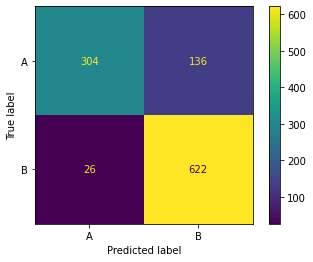

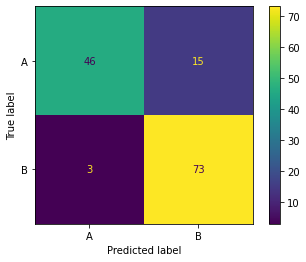

In [ ]:
cvc = tune_model(Logist_regr_clf, parameters_log_regr, 
               x_train, x_test, 
               y_train, y_test)

cvc_log_regr=cvc

Observamos que con este método obtenemos:

* Accuracy train 85.1%
* Accuracy test 86.9%

Se observa una mejora en el accuracy con el ajuste de hiperpárametros del modelo de regresión logística, ya que este pasa de 84% a 86,9%.

In [ ]:
cvc_log_regr.best_estimator_

LogisticRegression(C=0.046415888336127774, penalty='l1', random_state=100,
                   solver='liblinear')

Mejor estimador:

*  C= 0.046
*  penalty = "l1"
*  solver= "liblinear"
*  max_iter = 200

In [ ]:
#cvc.best_estimator_.coef_
#bestcoef = pd.Series(cvc.best_estimator_.coef_[0], index = X.columns)

#bestcoef.plot(kind="bar")
#cvc.best_estimator_.coef_
bestcoef_rl = pd.Series(cvc.best_estimator_.coef_[0], index = X.columns).sort_values(ascending=False)
bestcoef_rl.tail()
#bestcoef.plot(kind="bar")

state_Bolivar        0.000000
state_Bogota         0.000000
state_Bio Bio        0.000000
state_Barinas        0.000000
number_of_records   -5.363087
dtype: float64

Se observa que las variable más influyentes para la predicción son el número de registro de los jugadores (con valor negativo).  

**Gradient Boosting**

Entrenamos el modelo de XG boost con los parámetros por defecto.

In [ ]:
from xgboost import XGBClassifier, XGBRFClassifier
xgb_clf = XGBClassifier(random_state = random_state_n)


In [ ]:
xgb_clf.fit(x_train, y_train)

XGBClassifier(random_state=100)

In [ ]:
y_pred_xg = xgb_clf.predict(x_test)
accuracy_score(y_pred_xg, y_test)

0.8321167883211679

En este caso se obtuvo un accuracy del 83%.

**Ajuste de hiperparámetros**

Los parámetros que ajustaremos para el modelo de XG boost son:

* objetive: Especifica la tarea de aprendizaje y el objetivo de aprendizaje correspondiente a una función objetivo personalizada que se utilizará. En nuestro caso usaremos "reg:linear"(regresión lineal) y "reg:logistic"(regreción logística).

*  colsample_bytree: Es la relación de submuestra de las columnas al construir cada árbol. El submuestreo ocurre una vez por cada árbol construido.

* learning_rate: La tasa de aprendizaje.

* max_depth: Aumentar este valor hará que el modelo sea más complejo y más propenso a sobreajustarse. 0 indica que no hay límite de profundidad.

* alpha: Termino de regularización L1.

* n_estimators: Número de árboles para entrenar.



In [ ]:
xgboost_grid = dict(objective =['reg:squarederror', 'reg:logistic'],
                         colsample_bytree = [0.1,0.3,0.6],
                         learning_rate = [0.01, 0.1, 0.2, 0.5],
                         max_depth = [2,3,5,7,10], 
                         alpha = [20, 50, 100], 
                         n_estimators = [5,10, 50,100,250])

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_objective,param_n_estimators,param_max_depth,param_learning_rate,param_colsample_bytree,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.041287,0.006803,0.004554,0.000269,reg:squarederror,10,2,0.1,0.6,50,"{'objective': 'reg:squarederror', 'n_estimator...",0.848624,0.885321,0.844037,0.852535,0.815668,0.849237,0.022214,1
16,0.141921,0.002499,0.007273,0.002586,reg:squarederror,100,5,0.2,0.1,100,"{'objective': 'reg:squarederror', 'n_estimator...",0.816514,0.894495,0.853211,0.838710,0.834101,0.847406,0.026299,2
14,0.025918,0.002904,0.004171,0.000071,reg:squarederror,5,3,0.2,0.3,20,"{'objective': 'reg:squarederror', 'n_estimator...",0.848624,0.899083,0.821101,0.847926,0.815668,0.846480,0.029554,3
15,0.026440,0.000826,0.004388,0.000430,reg:logistic,10,2,0.5,0.1,20,"{'objective': 'reg:logistic', 'n_estimators': ...",0.844037,0.876147,0.834862,0.847926,0.820276,0.844650,0.018401,4
17,0.110884,0.009470,0.004603,0.000142,reg:squarederror,100,2,0.1,0.1,20,"{'objective': 'reg:squarederror', 'n_estimator...",0.844037,0.880734,0.839450,0.843318,0.815668,0.844641,0.020838,5
25,0.184713,0.035764,0.005584,0.001870,reg:squarederror,100,2,0.1,0.1,50,"{'objective': 'reg:squarederror', 'n_estimator...",0.844037,0.880734,0.839450,0.843318,0.815668,0.844641,0.020838,5
26,0.753985,0.098414,0.012523,0.004313,reg:logistic,250,2,0.2,0.6,100,"{'objective': 'reg:logistic', 'n_estimators': ...",0.802752,0.871560,0.862385,0.847926,0.834101,0.843745,0.024133,7
22,0.066425,0.013415,0.010598,0.002973,reg:logistic,5,7,0.1,0.6,100,"{'objective': 'reg:logistic', 'n_estimators': ...",0.830275,0.862385,0.848624,0.852535,0.824885,0.843741,0.014040,8
5,0.134619,0.004652,0.004615,0.000066,reg:squarederror,100,2,0.1,0.3,50,"{'objective': 'reg:squarederror', 'n_estimator...",0.821101,0.889908,0.839450,0.861751,0.806452,0.843732,0.029588,9
24,0.068707,0.013618,0.008583,0.003139,reg:logistic,10,3,0.01,0.6,100,"{'objective': 'reg:logistic', 'n_estimators': ...",0.853211,0.894495,0.821101,0.843318,0.806452,0.843715,0.030229,10


Accuracy train 85.4%
Accuracy test 86.9%

 Train

 Test


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


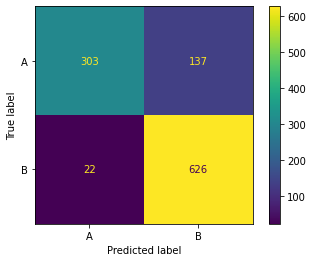

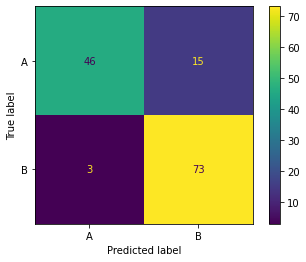

In [ ]:
cvc = tune_model_random(xgb_clf,
           xgboost_grid,
            x_train, x_test, 
            y_train, y_test)
cvc_xgboost = cvc

Observamos que con este método obtenemos:

* Accuracy train 85.4%
* Accuracy test 86.9%

Nuevamente, se observa una mejora en el accuracy con el ajuste de hiperpárametros, ya que este pasa de 83% a 86,9%.

In [ ]:
cvc_xgboost.best_estimator_

XGBClassifier(alpha=50, colsample_bytree=0.6, max_depth=2, n_estimators=10,
              objective='reg:squarederror', random_state=100)

Mejor estimador:

*  alpha= 50
*  colsample_bytree = 0.6
*  max_depth= 2
*  n_estimator = 10
*  objective ='reg:squarederror'
*  learning_rate = 0.2 

In [ ]:
#cvc.best_estimator_.coef_
bestcoef_xg = pd.Series(cvc.best_estimator_.feature_importances_, index = X.columns).sort_values(ascending=False)
bestcoef_xg[:10]
#bestcoef.plot(kind="bar")

number_of_records      0.925265
state_Rio Negro        0.022999
state_Salta            0.021443
state_Anzoategui       0.018174
state_Bolivar          0.012120
state_Otro             0.000000
state_Nueva esparta    0.000000
state_Neuquen          0.000000
state_Montevideo       0.000000
state_Monagas          0.000000
dtype: float32

Se observa que las variables más influyentes para la predicción son el número de registro de los jugadores, 'state_Rio Negro', 'state_Salta' y 'state_Anzoategui.'. 

**Elección del mejor modelo de clasificación**

Como se puede ver, los tres modelos clasifican bien a los jugadores en las categorías que les corresponden. En los tres casos el accuracy ronda el 87%, esto nos indica un buena clasificación.

**Realizamos la predicción sobre el conjunto de datos de validación**

Se escogió como mejor modelo al XG boost con los parametros anteriormente especificados.

In [ ]:
# Elegir mejor modelo
# cvc_xgboost, cvc_rf, cvc_log_regr
clf = cvc_xgboost.best_estimator_
clf

XGBClassifier(alpha=50, colsample_bytree=0.6, max_depth=2, n_estimators=10,
              objective='reg:squarederror', random_state=100)

In [ ]:
val_predictions = clf.predict(x_valid)


In [ ]:
accuracy_score(y_valid, val_predictions)

0.8676470588235294


 validación


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


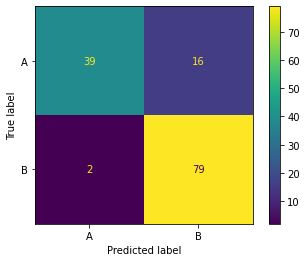

In [ ]:
print("\n validación")
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
#cm= confusion_matrix(y_valid,val_predictions, labels=clf.classes_)
#disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
#disp.plot()
plot_confusion_matrix(clf,x_valid,y_valid)

In [ ]:
print(classification_report(y_true = y_valid,
                            y_pred = val_predictions,zero_division=0))

              precision    recall  f1-score   support

           A       0.95      0.71      0.81        55
           B       0.83      0.98      0.90        81

    accuracy                           0.87       136
   macro avg       0.89      0.84      0.86       136
weighted avg       0.88      0.87      0.86       136



##Sección 3: Conclusiones

*   El modelo elegido para la clasificación de los jugadores (A: jugadores Buenos, B: jugadores malos) es "XG boost" con los parámetros anteriormente especificados (alpha=50, colsample_bytree=0.6, max_depth=2, n_estimators=10,  objective='reg:squarederror', random_state=100).
*   El accuracy obtenido en el conjunto de validación es del 87%, es decir, que clasifica bastante bien a los features de entrada. Este indicador podria mejorar si contaramos con más datos, en especial en la etapa de entrenamiento del modelo.
*   Además, se puede destacar que para los tres modelos, la variable o feature que más influencia o "peso" tuvo en los mismos fue "number_of_records", es decir, el numero de registro de los jugadores.

